**This analysis follows the results from the paper**

In [1]:
import scanpy as sc

In [5]:
adata_wt = sc.read_csv("../data/GSM5359947_D20-3958_WT.csv.gz").T
adata_wt

AnnData object with n_obs × n_vars = 2735 × 31053

In [41]:
adata_ko = sc.read_csv("../data/GSM5359948_D20-3959_KO.csv.gz").T
adata_ko

AnnData object with n_obs × n_vars = 1785 × 31053

In [42]:
adata_wt.obs["treatment"] = "WT"
adata_ko.obs["treatment"] = "KO"

In [43]:
# Labeling mitochondrial genes
adata_wt.var["mt"] = adata_wt.var_names.str.startswith("mt-")
adata_ko.var["mt"] = adata_ko.var_names.str.startswith("mt-")

In [36]:
# calculating metrics
sc.pp.calculate_qc_metrics(adata_wt, qc_vars=["mt"], inplace = True, percent_top=None, log1p=False)
sc.pp.calculate_qc_metrics(adata_ko, qc_vars=["mt"], inplace = True, percent_top=None, log1p=False)

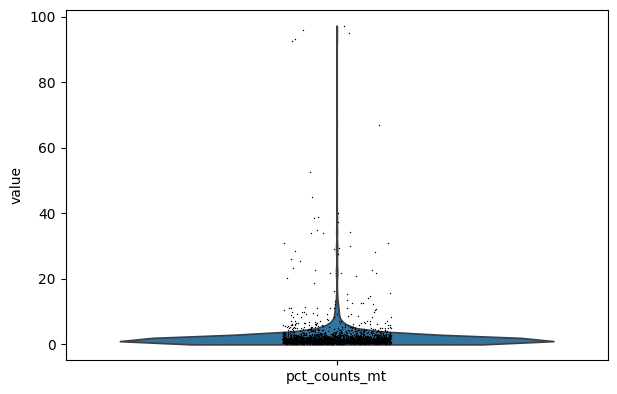

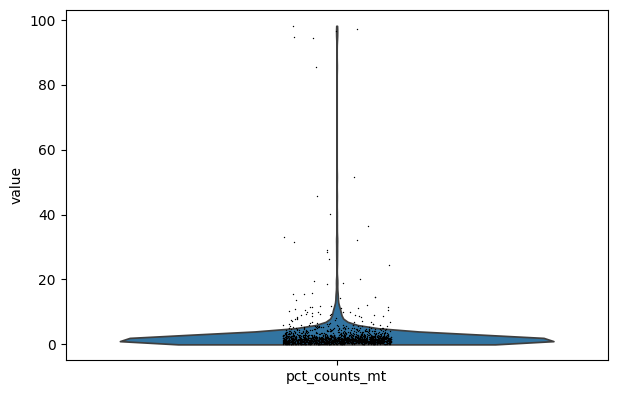

In [63]:
sc.pl.violin(adata_wt, keys = "pct_counts_mt")
sc.pl.violin(adata_ko, keys = "pct_counts_mt")

In [15]:
adata = sc.concat([adata_wt, adata_ko])

/home/kwon.so/.conda/envs/figureOneLab/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [22]:
adata

AnnData object with n_obs × n_vars = 4520 × 31053
    obs: 'treatment'

4519